#                                                         Project Phase 1
### Surya Venkata Rohit Moganti - 50560088
### Bhavani Kiran Kukunoor - 50560517

## Installing necessary libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install imblearn




# Importing Necessary Libraries

In [2]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/b0/kmv3xkq15d348v9hg51y4r9h0000gn/T/ipykernel_15084/2825159026.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
Dataset = pd.read_csv('Insurance_Data.csv')
Dataset.head(10)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [4]:
print("Total Numbe Of Rows Present in The Datase are : " , len(Dataset))

Total Numbe Of Rows Present in The Datase are :  50882


In [5]:
print("The Size of the Dataset is : ",Dataset.shape)

The Size of the Dataset is :  (50882, 14)


# Finding the Columns which have missing values in them

In [6]:
Missing_values = Dataset.isnull()
#print(Missing_values)
Nan_List = []
for Column in Missing_values:
    temp_count = 0
    for row in Missing_values[Column]:
        if row:
            temp_count += 1
            
    print(f"Number of missing Values in {Column} column are {temp_count}")
    
    if temp_count > 0 : # If Count of missing values is greater than 0 we store the columns in a list
        Nan_List.append(Column)

print("\n The Columns with missing values are : " ,Nan_List)

Number of missing Values in ID column are 0
Number of missing Values in City_Code column are 0
Number of missing Values in Region_Code column are 0
Number of missing Values in Accomodation_Type column are 0
Number of missing Values in Reco_Insurance_Type column are 0
Number of missing Values in Upper_Age column are 0
Number of missing Values in Lower_Age column are 0
Number of missing Values in Is_Spouse column are 0
Number of missing Values in Health Indicator column are 11691
Number of missing Values in Holding_Policy_Duration column are 20251
Number of missing Values in Holding_Policy_Type column are 20251
Number of missing Values in Reco_Policy_Cat column are 0
Number of missing Values in Reco_Policy_Premium column are 0
Number of missing Values in Response column are 0

 The Columns with missing values are :  ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']


## Dealing with Health Indicator Column

In [7]:
# The name of the column is with a space and it might be a problem further
# Adding underscore to the column name [Health_Indicator]


Dataset = Dataset.rename(columns={'Health Indicator': 'Health_Indicator'})
Dataset.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
# Analysis on the values and their types in Health Indicator column
print(Dataset['Health_Indicator'].value_counts())
# There are 11691 missing rows in Health Indicator column
print(Dataset['Health_Indicator'].dtypes)

Health_Indicator
X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: count, dtype: int64
object


In [9]:
# Replacing the missing values with mode will make the coloumn biased to one category
# Here we are including forward fill concept where the missing value is replaces with its forward value in the column

Dataset['Health_Indicator'] = Dataset['Health_Indicator'].ffill()

print(Dataset['Health_Indicator'].value_counts())

Health_Indicator
X1    17020
X2    13309
X3     8722
X4     7471
X5     2242
X6     1683
X7      258
X8      104
X9       73
Name: count, dtype: int64


In [10]:
#Performing One Hot Encoding for this Health_Indicator column as it is a categorical column.
Health_Indicator_One_Hot = pd.get_dummies(Dataset['Health_Indicator'],prefix = 'HI_',dtype = 'int')


#Health_Indicator_One_Hot.head()
#len(Health_Indicator_One_Hot)


#Concating this new Dataframe to the existing Dataset
Dataset = pd.concat([Dataset, Health_Indicator_One_Hot], axis=1)
#Dataset = Dataset.drop('Health_Indicator', axis = 1)

In [11]:
Dataset.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,...,Response,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,...,0,1,0,0,0,0,0,0,0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,...,0,0,1,0,0,0,0,0,0,0
2,3,C5,3732,Owned,Individual,32,32,No,X2,1.0,...,1,0,1,0,0,0,0,0,0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,...,0,1,0,0,0,0,0,0,0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,...,0,0,1,0,0,0,0,0,0,0


# Dealing with Holding Policy Duration Column

In [12]:
# Handling Missing Values in Holding_Policy_Indicator
print(Dataset['Holding_Policy_Duration'].value_counts())
# There are 20251 missing values in this column
print(Dataset['Holding_Policy_Duration'].dtype)

Holding_Policy_Duration
1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: count, dtype: int64
object


In [13]:
#There is a string datatype in this column saying 14+ 
#Now Change this value to numeric Form
# 14+ here might indicate that the term is greater than 14 hence let us keep the value as 15 which is greater than 14 

Dataset['Holding_Policy_Duration'] = Dataset['Holding_Policy_Duration'].replace('14+', 15.0)

In [14]:
#The Column here is comprised to inconsistent datatypes 
#Let us change all the values to float datatype

Dataset['Holding_Policy_Duration'] = Dataset['Holding_Policy_Duration'].astype(float)

In [15]:
#In order to compute Mean of the column let us first change the Nan values to 0
Dataset['Holding_Policy_Duration'] = Dataset['Holding_Policy_Duration'].fillna(0)

In [16]:
#Since the column here is an Numeric Column
#We can replace the missing values with the mean of the remaining values


Mean_of_Column = Dataset['Holding_Policy_Duration'].mean()
Mean_of_Column = float(math.ceil(Mean_of_Column))
print(Mean_of_Column)


#Fill the Mean value to all the missing values in the column
Dataset['Holding_Policy_Duration'] = Dataset['Holding_Policy_Duration'].replace(0,Mean_of_Column)


4.0


In [17]:
Dataset.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,...,Response,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9
0,1,C3,3213,Rented,Individual,36,36,No,X1,15.0,...,0,1,0,0,0,0,0,0,0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,4.0,...,0,0,1,0,0,0,0,0,0,0
2,3,C5,3732,Owned,Individual,32,32,No,X2,1.0,...,1,0,1,0,0,0,0,0,0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,15.0,...,0,1,0,0,0,0,0,0,0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,...,0,0,1,0,0,0,0,0,0,0


# Dealing with Holding_Policy_Type column


In [18]:
print(Dataset['Holding_Policy_Type'].value_counts())

Holding_Policy_Type
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: count, dtype: int64


In [19]:
#There are four different cateogries in this column and we are replacing and new values to [ 0.0 ]
Dataset['Holding_Policy_Type'] = Dataset['Holding_Policy_Type'].fillna(0.0)
# By doing this we clearly state that the value 0.0 is assigned for a missing value

# Dealing with Accomodation_Type, Reco_Insurance_Type, Is_Spouse columns

In [20]:
# These columns are binary classification column and hence we can change these values to 0 or 1

Dataset['Accomodation_Type'] = Dataset['Accomodation_Type'].replace('Rented',0)
Dataset['Accomodation_Type'] = Dataset['Accomodation_Type'].replace('Owned',1) 

Dataset['Reco_Insurance_Type'] = Dataset['Reco_Insurance_Type'].replace('Individual',0)
Dataset['Reco_Insurance_Type'] = Dataset['Reco_Insurance_Type'].replace('Joint',1) 

Dataset['Is_Spouse'] = Dataset['Is_Spouse'].replace('No',0)
Dataset['Is_Spouse'] = Dataset['Is_Spouse'].replace('Yes',1) 

/var/folders/b0/kmv3xkq15d348v9hg51y4r9h0000gn/T/ipykernel_15084/3262153694.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset['Accomodation_Type'] = Dataset['Accomodation_Type'].replace('Owned',1)
/var/folders/b0/kmv3xkq15d348v9hg51y4r9h0000gn/T/ipykernel_15084/3262153694.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset['Reco_Insurance_Type'] = Dataset['Reco_Insurance_Type'].replace('Joint',1)
/var/folders/b0/kmv3xkq15d348v9hg51y4r9h0000gn/T/ipykernel_15084/3262153694.py:10: FutureWarning: Downcasting behavior

In [21]:
Dataset.tail(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,...,Response,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9
50872,50873,C3,567,0,0,61,61,0,X2,4.0,...,0,0,1,0,0,0,0,0,0,0
50873,50874,C12,5450,1,0,65,65,0,X2,6.0,...,0,0,1,0,0,0,0,0,0,0
50874,50875,C6,195,0,0,26,26,0,X1,5.0,...,0,1,0,0,0,0,0,0,0,0
50875,50876,C6,231,0,0,36,36,0,X3,2.0,...,1,0,0,1,0,0,0,0,0,0
50876,50877,C26,579,1,0,37,37,0,X3,2.0,...,0,0,0,1,0,0,0,0,0,0
50877,50878,C4,845,0,0,22,22,0,X3,4.0,...,0,0,0,1,0,0,0,0,0,0
50878,50879,C5,4188,0,0,27,27,0,X3,7.0,...,0,0,0,1,0,0,0,0,0,0
50879,50880,C1,442,0,0,63,63,0,X2,15.0,...,0,0,1,0,0,0,0,0,0,0
50880,50881,C1,4,1,1,71,49,0,X2,2.0,...,1,0,1,0,0,0,0,0,0,0
50881,50882,C3,3866,0,0,24,24,0,X3,2.0,...,0,0,0,1,0,0,0,0,0,0


# Handling Duplicates in the ID column 


In [22]:
Dataset[Dataset.duplicated('ID')]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,...,Response,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9


In [23]:
# Since there are no Duplicates We can drop this Column
Dataset = Dataset.drop('ID', axis = 1)

In [24]:
# Checking for entire row duplicates in the Dataset

duplicated_rows = Dataset[Dataset.duplicated()]

duplicated_rows

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,Response,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9


# Handling City Code Column 

In [25]:
# There are different categories in the City_Code Column lets convert it to Numeric Data
# We can perform this by Label Encoding concept
Dataset['City_Code'] = Dataset['City_Code'].astype('category')
Dataset.dtypes

City_Code                  category
Region_Code                   int64
Accomodation_Type             int64
Reco_Insurance_Type           int64
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                     int64
Health_Indicator             object
Holding_Policy_Duration     float64
Holding_Policy_Type         float64
Reco_Policy_Cat               int64
Reco_Policy_Premium         float64
Response                      int64
HI__X1                        int64
HI__X2                        int64
HI__X3                        int64
HI__X4                        int64
HI__X5                        int64
HI__X6                        int64
HI__X7                        int64
HI__X8                        int64
HI__X9                        int64
dtype: object

In [26]:
# Dataset['Health_Indicator'].head()
Dataset['City_Code_encoded'] = Dataset['City_Code'].cat.codes

In [27]:
Dataset[['City_Code','City_Code_encoded']]

,City_Code,City_Code_encoded
0,C3,22
1,C5,31
2,C5,31
3,C24,16
4,C8,34
...,...,...
50877,C4,30
50878,C5,31
50879,C1,0
50880,C1,0


# Handling Outliers For Numeric Data using InterQuartile Range
## Checking the Outliers for there continous data column [Upper_Age,Lower_Age,Reco_Policy_Premium]

In [28]:
# Create function which takes a column as input and returns its IQR

def InterQuartileRange(Column):
    Quartile_1 = Dataset[Column].quantile(0.25)
    Quartile_3 = Dataset[Column].quantile(0.75)
    Inter_Quartile_Range = Quartile_3 - Quartile_1
    return [Quartile_1 - (1.5 * Inter_Quartile_Range) , Quartile_3 + (1.5 * Inter_Quartile_Range)]

#print(InterQuartileRange('Upper_Age'))

In [29]:
len(Dataset)

50882

In [30]:
Outlier_Column_List = ['Upper_Age','Lower_Age','Reco_Policy_Premium']

for Column in Outlier_Column_List:
    Outlier_count = 0
    Range = Range = InterQuartileRange(Column)
    print(f'Inter Quartile Range for {Column} Column is : {Range}')
    
    for i in Dataset[Column]:
        if i < Range[0] or i > Range[1]:
            Outlier_count += 1
    print(f'There are {Outlier_count} Outliers in the given column \n')

Inter Quartile Range for Upper_Age Column is : [-18.5, 105.5]
There are 0 Outliers in the given column 

Inter Quartile Range for Lower_Age Column is : [-18.0, 102.0]
There are 0 Outliers in the given column 

Inter Quartile Range for Reco_Policy_Premium Column is : [-4024.0, 31368.0]
There are 821 Outliers in the given column 



In [31]:
Range = InterQuartileRange('Reco_Policy_Premium')[1]

'''
This piece of code here means that There are 679 entires where the premium is high and the person lives in an own house and wants a joint
Insurance Account hence these outliers have meaning.
All the other outliers can be removed
'''
count = 0
for index, row in Dataset.iterrows():
    if row['Reco_Policy_Premium'] > Range:
        if row['Accomodation_Type'] == 1 and row['Reco_Insurance_Type'] == 1:
            count += 1
            #print(row)
print('Number of Rows that meet the above codition : ',count)

Number of Rows that meet the above codition :  679


In [32]:
# Total number of Outliers
Range = InterQuartileRange('Reco_Policy_Premium')[1]
count = 0
for i in Dataset['Reco_Policy_Premium']:
    if i > Range:
        count += 1
print(f'There are {count} outliers in this Column')

'''
The outliers who are having a rented house or an individual account can be removed as they 
have high insurance premium but live in a rented home or taking an individual account
'''

Condition = (Dataset['Reco_Policy_Premium'] > Range) & ((Dataset['Accomodation_Type'] == 0) | (Dataset['Reco_Insurance_Type'] == 0))
removed_outliers = len(Dataset[Condition])
Dataset_temp = Dataset[~Condition]


There are 821 outliers in this Column


In [33]:
print(f'Number of outlier rows dropped from the table : {removed_outliers}')
Dataset = Dataset_temp
print('\n Dataset with new rows is of length :',len(Dataset))

Number of outlier rows dropped from the table : 142

 Dataset with new rows is of length : 50740


# Handling Region Code Column

In [34]:
# Region code column has a wide range of values
Dataset['Region_Code'].max()
# 6194

6194

In [35]:
len(Dataset['Region_Code'])

50740

In [36]:
Dataset['Region_Code'].value_counts()

Region_Code
1       96
5       75
4       73
2       73
6       73
        ..
5353     1
6060     1
5874     1
5401     1
5450     1
Name: count, Length: 5316, dtype: int64

In [37]:
# This wide range of value might make our Machine Learning model slow in computation 
# Now we are Scaling down the values using Normalization (specifically min-max Normalization)
Column_min = Dataset['Region_Code'].min()
Column_max = Dataset['Region_Code'].max()

temp_dataset = Dataset.copy()

#temp_dataset.head()

temp_dataset['Region_Code'] = (Dataset['Region_Code'] - Column_min) / (Column_max - Column_min)

In [38]:
Dataset = temp_dataset.copy()

print(f'The value in this column range from {Dataset['Region_Code'].min()} and {Dataset['Region_Code'].max()}')


The value in this column range from 0.0 and 1.0


In [39]:
Dataset.shape

(50740, 23)

In [40]:
Dataset['Response'].value_counts()

Response
0    38568
1    12172
Name: count, dtype: int64

In [41]:
Dataset.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,...,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9,City_Code_encoded
count,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,...,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.00000
mean,0.279682,0.550867,0.201104,44.786894,42.709342,0.163993,5.293339,1.468013,15.113540,14127.213039,...,0.334549,0.261529,0.171206,0.146906,0.044127,0.033110,0.005085,0.002050,0.001439,14.98244
std,0.230025,0.497411,0.400829,17.281844,17.312282,0.370273,3.836449,1.435042,6.341197,6509.909218,...,0.471837,0.439472,0.376693,0.354015,0.205379,0.178925,0.071127,0.045227,0.037903,12.14750
min,0.000000,0.000000,0.000000,18.000000,16.000000,0.000000,1.000000,0.000000,1.000000,2280.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.084289,0.000000,0.000000,28.000000,27.000000,0.000000,4.000000,0.000000,12.000000,9232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
50%,0.224447,1.000000,0.000000,44.000000,40.000000,0.000000,4.000000,1.000000,17.000000,13156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.00000
75%,0.430648,1.000000,0.000000,59.000000,57.000000,0.000000,6.000000,3.000000,20.000000,18048.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.00000
max,1.000000,1.000000,1.000000,75.000000,75.000000,1.000000,15.000000,4.000000,22.000000,43350.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.00000


# Re Arrange Columns

In [42]:
Dataset.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9,City_Code_encoded
0,C3,0.518650,0,0,36,36,0,X1,15.0,3.0,...,1,0,0,0,0,0,0,0,0,22
1,C5,0.180203,1,1,75,22,0,X2,4.0,0.0,...,0,1,0,0,0,0,0,0,0,31
2,C5,0.602454,1,0,32,32,0,X2,1.0,1.0,...,0,1,0,0,0,0,0,0,0,31
3,C24,0.706766,1,1,52,48,0,X1,15.0,3.0,...,1,0,0,0,0,0,0,0,0,16
4,C8,0.353464,0,0,44,44,0,X2,3.0,1.0,...,0,1,0,0,0,0,0,0,0,34


In [43]:
Dataset = Dataset[['City_Code','City_Code_encoded','Region_Code','Accomodation_Type',
                   'Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Holding_Policy_Duration',
                   'Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','Health_Indicator',
                   'HI__X1','HI__X2','HI__X3',
                   'HI__X4','HI__X5','HI__X6',
                   'HI__X7','HI__X8','HI__X9','Response']]


In [44]:
Dataset.head()

,City_Code,City_Code_encoded,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9,Response
0,C3,22,0.518650,0,0,36,36,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
1,C5,31,0.180203,1,1,75,22,0,4.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,C5,31,0.602454,1,0,32,32,0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,C24,16,0.706766,1,1,52,48,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
4,C8,34,0.353464,0,0,44,44,0,3.0,1.0,...,0,1,0,0,0,0,0,0,0,0


# Exploratory data Analysis

In [45]:
# Describing the Dataset

In [46]:
Dataset[['Holding_Policy_Duration','Upper_Age','Lower_Age','Reco_Policy_Premium']].describe()

,Holding_Policy_Duration,Upper_Age,Lower_Age,Reco_Policy_Premium
count,50740.000000,50740.000000,50740.000000,50740.000000
mean,5.293339,44.786894,42.709342,14127.213039
std,3.836449,17.281844,17.312282,6509.909218
min,1.000000,18.000000,16.000000,2280.000000
25%,4.000000,28.000000,27.000000,9232.000000
50%,4.000000,44.000000,40.000000,13156.000000
75%,6.000000,59.000000,57.000000,18048.000000
max,15.000000,75.000000,75.000000,43350.400000


In [47]:
Dataset.head()


,City_Code,City_Code_encoded,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9,Response
0,C3,22,0.518650,0,0,36,36,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
1,C5,31,0.180203,1,1,75,22,0,4.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,C5,31,0.602454,1,0,32,32,0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,C24,16,0.706766,1,1,52,48,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
4,C8,34,0.353464,0,0,44,44,0,3.0,1.0,...,0,1,0,0,0,0,0,0,0,0


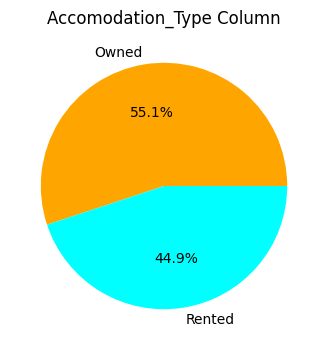

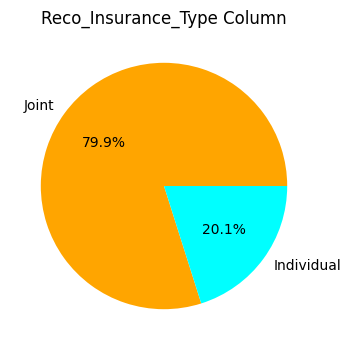

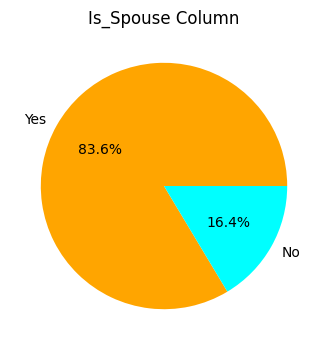

In [48]:
# Plotting pie plots for the binary classification columns in the dataframe
# Accomodation Type, Reco Insurance Type , Is Spouse


Pie_Chart_list = {'Accomodation_Type':['Owned','Rented'],'Reco_Insurance_Type':['Joint','Individual'],'Is_Spouse':['Yes','No']}


for Column in Pie_Chart_list.keys():
    Range_of_values = Dataset[Column].value_counts()
    plt.figure(figsize=(4, 4))
    plt.pie(Range_of_values, labels=Pie_Chart_list[Column], autopct='%1.1f%%',colors=['orange','cyan'])
    plt.title(f'{Column} Column')
    plt.show()

In [49]:
#How the Columns Accomodation_Type,Reco_Insurance_Type,Is_Spouse have effect on Response Column
grouped_data = Dataset.groupby(['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse'])['Response'].value_counts().unstack()
grouped_data

Response                                             0     1
Accomodation_Type Reco_Insurance_Type Is_Spouse             
0                 0                   0          15520  4754
                  1                   0            449   169
                                      1           1411   486
1                 0                   0          15376  4886
                  1                   0            930   335
                                      1           4882  1542

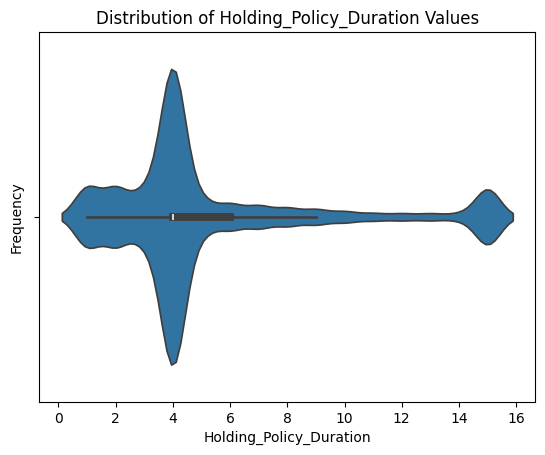

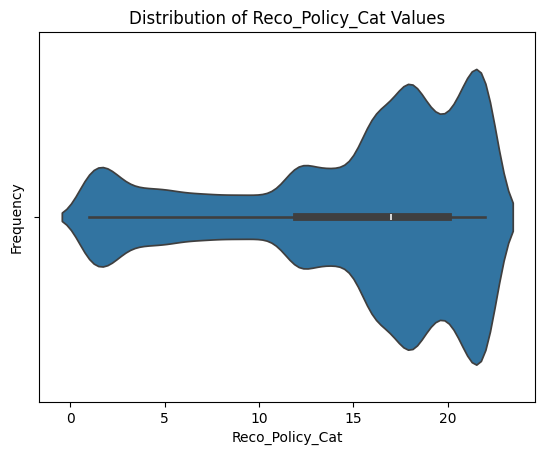

In [50]:
# Ploting how the values in the Health Indicator Column are spread

Violen_column_List = ['Holding_Policy_Duration','Reco_Policy_Cat']

for Column in Violen_column_List:
    
    sns.violinplot(x=Column, data=Dataset)
    plt.xlabel(Column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {Column} Values')
    plt.show()
# By this we can say that there are more number of people holding policy for 4 years




In [51]:
#How the Columns Holding_Policy_Duration,Reco_Policy_Cat have effect on Response Column

grouped_data = Dataset.groupby(['Holding_Policy_Duration', 'Reco_Policy_Cat'])['Response'].value_counts().unstack()
grouped_data.head(60)

Response                                     0      1
Holding_Policy_Duration Reco_Policy_Cat              
1.0                     1                211.0    1.0
                        2                266.0   26.0
                        3                 48.0   11.0
                        4                 85.0    7.0
                        5                 33.0   16.0
                        6                 68.0    5.0
                        7                 52.0    8.0
                        8                 45.0   10.0
                        9                 49.0   10.0
                        10                61.0    7.0
                        11                41.0    4.0
                        12               176.0   81.0
                        13               145.0   43.0
                        14               100.0   30.0
                        15                81.0   90.0
                        16               304.0   91.0
                        17               213.0   83.0
                        18               290.0   73.0
                        19               250.0   89.0
                        20               213.0   70.0
                        21               361.0   62.0
                        22               407.0  180.0
2.0                     1                197.0    NaN
                        2                152.0   41.0
                        3                 74.0   11.0
                        4                 83.0    6.0
                        5                 46.0   36.0
                        6                 54.0   20.0
                        7                 66.0   11.0
                        8                 44.0    6.0
                        9                 56.0    7.0
                        10                60.0   11.0
                        11                52.0   12.0
                        12               139.0   81.0
                        13               111.0   30.0
                        14                89.0   25.0
                        15                79.0   70.0
                        16               277.0   79.0
                        17               219.0   81.0
                        18               337.0   76.0
                        19               240.0   99.0
                        20               198.0   58.0
                        21               317.0   64.0
                        22               354.0  184.0
3.0                     1                144.0    NaN
                        2                127.0   16.0
                        3                 54.0   12.0
                        4                 91.0   11.0
                        5                 58.0   10.0
                        6                 57.0    9.0
                        7                 47.0    8.0
                        8                 38.0   13.0
                        9                 47.0    6.0
                        10                59.0   17.0
                        11                40.0    4.0
                        12               106.0   46.0
                        13               104.0   31.0
                        14                87.0   41.0
                        15                54.0   49.0
                        16               211.0   72.0

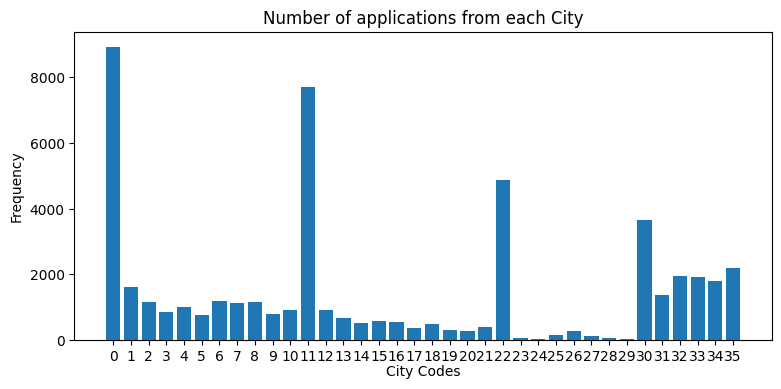

In [52]:

Range_of_values = Dataset['City_Code_encoded'].value_counts()

x_label = Range_of_values.index
y_label = Range_of_values.values
min_value = min(Dataset['City_Code_encoded'])
max_value = max(Dataset['City_Code_encoded'])

plt.figure(figsize=(9, 4))
plt.bar(x_label,y_label)
plt.xlabel('City Codes',labelpad =1)
plt.ylabel('Frequency')
plt.title('Number of applications from each City')
plt.xticks(range(int(min_value),int(max_value) + 1))

plt.show()

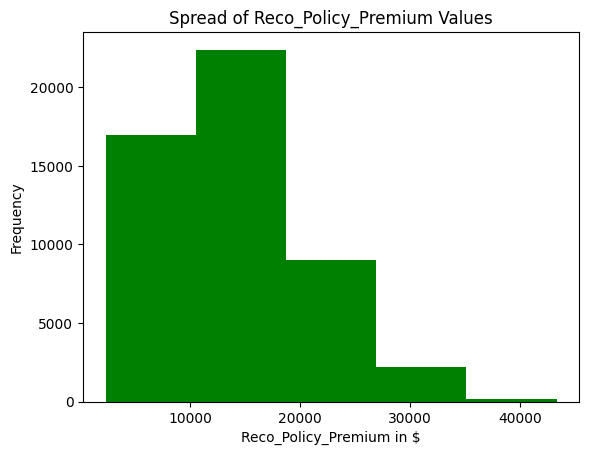

In [53]:
# Majority of the Reco_Policy_Premium rates are between 10k and 20k
plt.hist(Dataset['Reco_Policy_Premium'], bins=5, color='green')
plt.title('Spread of Reco_Policy_Premium Values')
plt.xlabel('Reco_Policy_Premium in $')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Response_count = Dataset.groupby(['Upper_Age', 'Response']).size()
# Response_count = Response_count.unstack()
# Response_count.head()

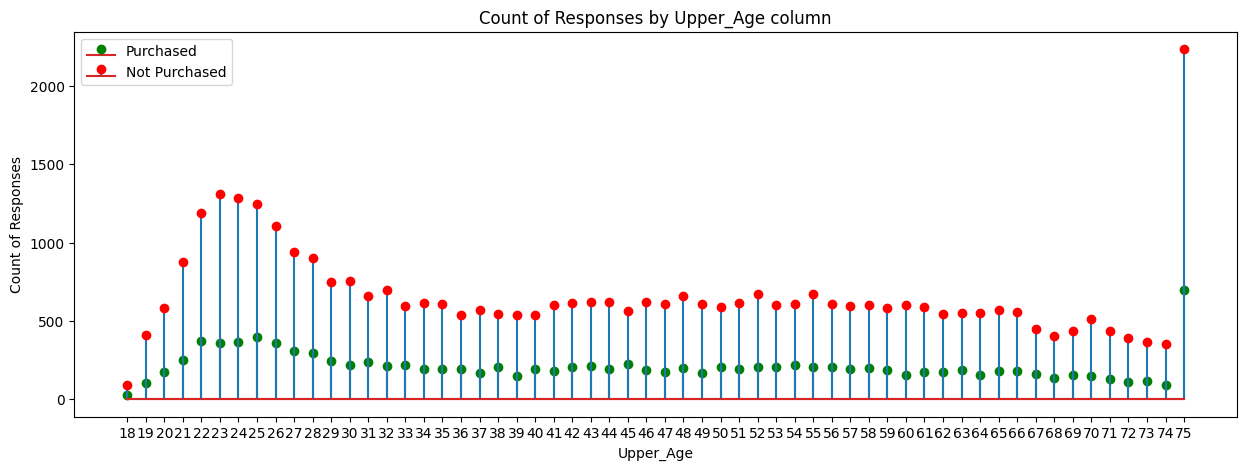

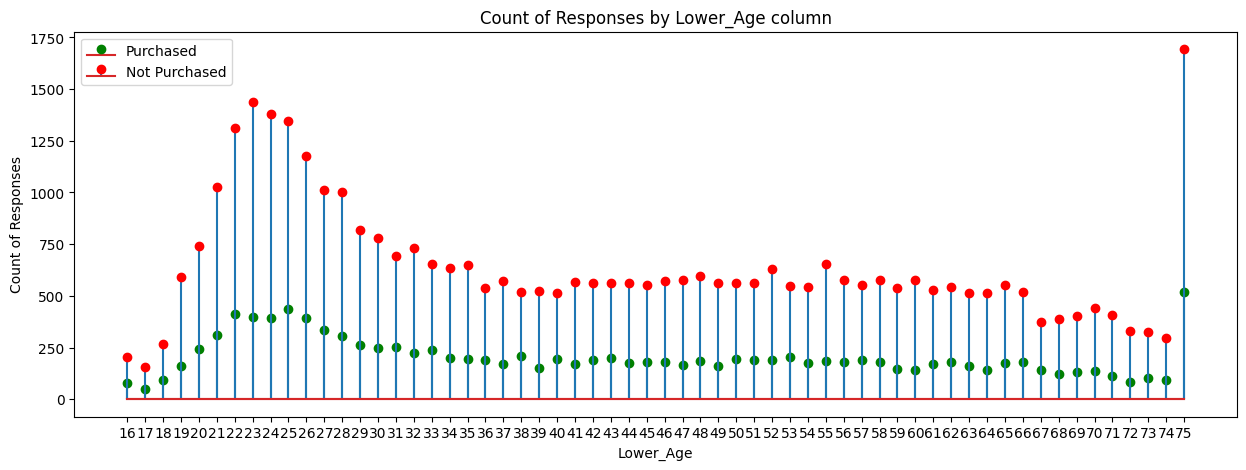

In [55]:
Age_Column_List = ['Upper_Age','Lower_Age']
#plt.figure(figsize=(15, 3))

for Column in Age_Column_List:
    plt.figure(figsize=(15, 5))
    Response_count = Dataset.groupby([Column, 'Response']).size()
    Response_count = Response_count.unstack()
    #Response_count.head()

    #plt.figure(figsize=(15, 8))


    plt.stem(Response_count.index, Response_count[1], markerfmt = 'go' )
    plt.stem(Response_count.index, Response_count[0], markerfmt = 'ro')


    min_value = min(Dataset[Column])
    max_value = max(Dataset[Column])
    plt.xticks(range(int(min_value),int(max_value) + 1,1))


    plt.title(f'Count of Responses by {Column} column')
    plt.xlabel(Column)
    plt.ylabel('Count of Responses')
    plt.legend(['Purchased', 'Not Purchased'])
    plt.show()
    
    

### Violen Plot for Health Indicator 

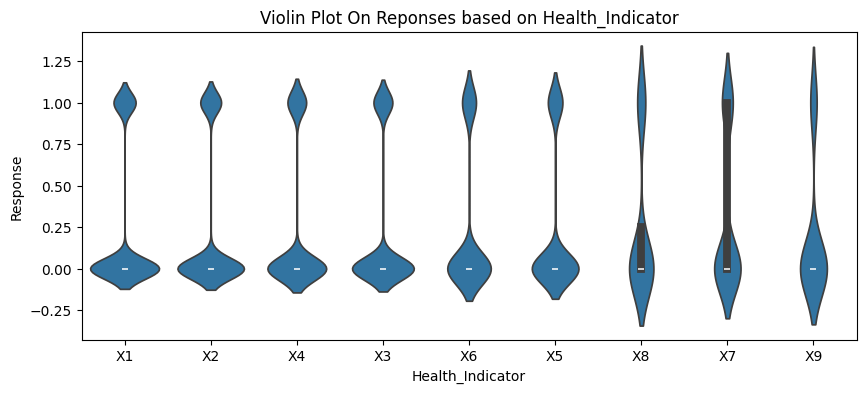

In [56]:
# Visualization on How the Response Depends on the Health of a person
plt.figure(figsize=(10, 4))
sns.violinplot(x='Health_Indicator', y='Response', data=Dataset)
plt.title('Violin Plot On Reponses based on Health_Indicator')
plt.xlabel('Health_Indicator')
plt.ylabel('Response')

plt.show()

In [57]:
grouped_data = Dataset.groupby('Holding_Policy_Type')['Response'].value_counts().unstack()
grouped_data

Response,0,1
Holding_Policy_Type,,
0.0,15378,4826
1.0,6227,1919
2.0,3804,1188
3.0,10030,3205
4.0,3129,1034


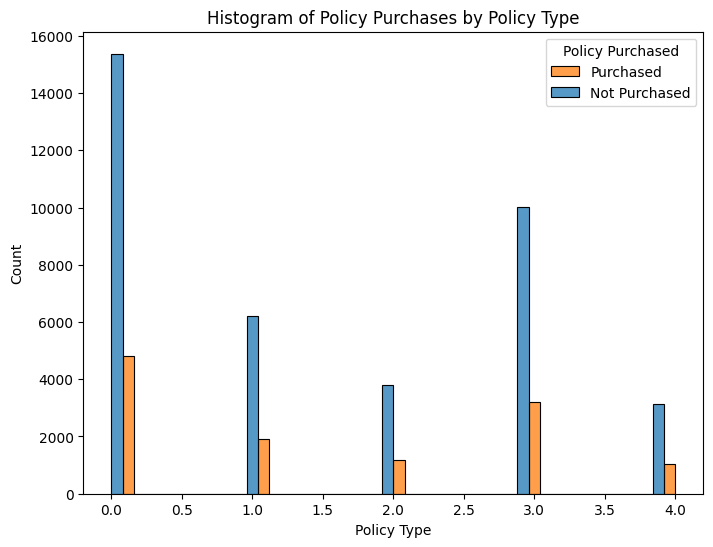

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Dataset, x='Holding_Policy_Type', hue = 'Response',multiple='dodge')

plt.title('Histogram of Policy Purchases by Policy Type')

plt.xlabel('Policy Type')
plt.ylabel('Count')

plt.legend(title='Policy Purchased', labels=['Purchased', 'Not Purchased'])

plt.show()

In [59]:
Dataset.head()

,City_Code,City_Code_encoded,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9,Response
0,C3,22,0.518650,0,0,36,36,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
1,C5,31,0.180203,1,1,75,22,0,4.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,C5,31,0.602454,1,0,32,32,0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,C24,16,0.706766,1,1,52,48,0,15.0,3.0,...,1,0,0,0,0,0,0,0,0,0
4,C8,34,0.353464,0,0,44,44,0,3.0,1.0,...,0,1,0,0,0,0,0,0,0,0


<Figure size 2000x600 with 0 Axes>

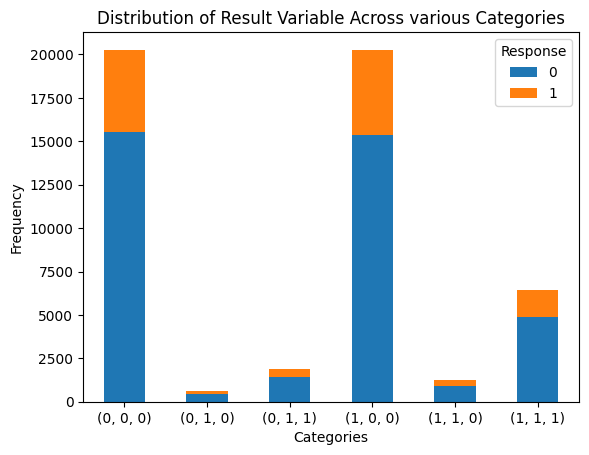

In [60]:
plt.figure(figsize=(20, 6))
Column_Group = Dataset.groupby(['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse'])['Response'].value_counts()

temp_plot = Column_Group.unstack()

temp_plot.plot(kind='bar', stacked=True)





plt.title('Distribution of Result Variable Across various Categories')

plt.xlabel('Categories')

plt.ylabel('Frequency')

plt.legend(title='Response')

plt.xticks(rotation=360)

plt.show()

# Project Phase 2
### Surya Venkata Rohit Moganti - 50560088
### Bhavani Kiran Kukunoor - 50560517

## Machine Learning Model Implementation

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier










## User Defined Functions

In [62]:
def Cal_precesion_f1_recalll(y_t , y_p):
    # Calculate Precision
    Precision = precision_score(y_t, y_p)
    
    # Calculate Recall
    Recall = recall_score(y_t, y_p)

    # Calculate F1 Score
    F1 = f1_score(y_t, y_p)

    return {'Precesion':Precision, 'Recall':Recall , 'F1 Score': F1}

In [63]:
def confusion_matrix_visualize(cm):
    # Plotting the confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    

In [64]:
def Summary_bar_graph(dic):
    labels = list(dic.keys())
    values = list(dic.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, width=0.2)  
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Performance Metrics Summary')
    plt.show()
    

## Preparing the Dataset

In [65]:
# Initially we take all the features into X vector and the target into y
X  = Dataset.copy()
y =  X.pop('Response')

In [66]:
# We conduct a train test split that is 80% data for training and 20% data to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [67]:
X_train

,City_Code,City_Code_encoded,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,Health_Indicator,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9
42339,C10,1,0.078960,1,1,31,30,1,4.0,0.0,...,X1,1,0,0,0,0,0,0,0,0
634,C22,14,0.041821,1,0,32,32,0,4.0,0.0,...,X2,0,1,0,0,0,0,0,0,0
27215,C15,6,0.007912,1,1,48,19,0,5.0,3.0,...,X1,1,0,0,0,0,0,0,0,0
35632,C24,16,0.507508,0,1,43,35,1,4.0,3.0,...,X3,0,0,1,0,0,0,0,0,0
25105,C2,11,0.437106,0,1,30,29,1,4.0,0.0,...,X4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37397,C29,21,0.265622,1,0,65,65,0,4.0,0.0,...,X2,0,1,0,0,0,0,0,0,0
26116,C1,0,0.736638,1,1,51,19,1,6.0,2.0,...,X1,1,0,0,0,0,0,0,0,0
48934,C6,32,0.227676,0,0,57,57,0,4.0,0.0,...,X3,0,0,1,0,0,0,0,0,0
23952,C17,8,0.403520,0,0,56,56,0,6.0,3.0,...,X2,0,1,0,0,0,0,0,0,0


In [68]:
# Cosidering only numerical columns for training
# All numeric columns
X_train = X_train[["City_Code_encoded","Region_Code","Accomodation_Type","Reco_Insurance_Type","Upper_Age","Lower_Age","Is_Spouse","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium","HI__X1","HI__X2","HI__X3","HI__X4","HI__X5","HI__X6","HI__X7","HI__X8","HI__X9"]]
X_test = X_test[["City_Code_encoded","Region_Code","Accomodation_Type","Reco_Insurance_Type","Upper_Age","Lower_Age","Is_Spouse","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium","HI__X1","HI__X2","HI__X3","HI__X4","HI__X5","HI__X6","HI__X7","HI__X8","HI__X9"]]





In [69]:
X_train

,City_Code_encoded,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,HI__X1,HI__X2,HI__X3,HI__X4,HI__X5,HI__X6,HI__X7,HI__X8,HI__X9
42339,1,0.078960,1,1,31,30,1,4.0,0.0,19,11682.0,1,0,0,0,0,0,0,0,0
634,14,0.041821,1,0,32,32,0,4.0,0.0,21,8736.0,0,1,0,0,0,0,0,0,0
27215,6,0.007912,1,1,48,19,0,5.0,3.0,22,24499.2,1,0,0,0,0,0,0,0,0
35632,16,0.507508,0,1,43,35,1,4.0,3.0,10,20899.2,0,0,1,0,0,0,0,0,0
25105,11,0.437106,0,1,30,29,1,4.0,0.0,17,20576.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37397,21,0.265622,1,0,65,65,0,4.0,0.0,7,17040.0,0,1,0,0,0,0,0,0,0
26116,0,0.736638,1,1,51,19,1,6.0,2.0,5,16128.0,1,0,0,0,0,0,0,0,0
48934,32,0.227676,0,0,57,57,0,4.0,0.0,1,15232.0,0,0,1,0,0,0,0,0,0
23952,8,0.403520,0,0,56,56,0,6.0,3.0,22,15340.0,0,1,0,0,0,0,0,0,0


In [70]:
X_train['Reco_Policy_Cat']


42339    19
634      21
27215    22
35632    10
25105    17
         ..
37397     7
26116     5
48934     1
23952    22
28240    18
Name: Reco_Policy_Cat, Length: 40592, dtype: int64

In [71]:
# We have uncertain class types in the labels and we need to Re sample the data in order to avoid bias towards on class

resample = SMOTE()
X_resampled, y_resampled = resample.fit_resample(X_train, y_train)
X_t_resampled, y_t_resampled = resample.fit_resample(X_test, y_test)


In [72]:
X_resampled.shape

(61708, 20)

In [73]:
y_resampled.value_counts()

Response
0    30854
1    30854
Name: count, dtype: int64

In [74]:
# The data is spread across various scales and we need to scale all the elements 
# under one scale to reduce bias on one feature and also decrease load on the ML model
scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_t_resampled)

In [76]:
# We have our final X_train which is X_train_scaled and X_test which is X_test_scaled
# We have our final y_train which is y_resampled and y_test which is y_t_resampled


## Linear Regression

In [77]:
# We Access the feature of Linear Regression module from SKlearn
LinearReg = LinearRegression()

In [78]:
# Testing the accuracy of the model with scaled data
LinearReg.fit(X_train_scaled, y_resampled)

LinearRegression()

In [79]:
# Predicting the target with our testing data
y_predict = LinearReg.predict(X_test_scaled)

In [80]:
y_predict

array([0.31215559, 0.32728725, 0.32106162, ..., 0.42149666, 0.98153509,
       0.39157206])

In [81]:
# Linear regression only predicts continous values and inorder to make it work for classification problems
# We give a specefic threshould and and if the continous values fall greater than the threshould then we keep it as 1 else 0

threshold = 0.5
y_predict_target = np.where(y_predict > threshold, 1, 0)

In [82]:
accuracy = accuracy_score(y_t_resampled, y_predict_target)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.60%


In [83]:
# We Access the feature of Linear Regression module from SKlearn
LinearReg = LinearRegression()

In [84]:
# Testing the accuracy of the model with not scaled data
LinearReg.fit(X_resampled,y_resampled)

LinearRegression()

In [85]:
# Predicting the target with our testing data
y_predict = LinearReg.predict(X_t_resampled)

In [86]:
y_predict

array([0.31215559, 0.32728725, 0.32106162, ..., 0.42149666, 0.98153509,
       0.39157206])

In [87]:
# Linear regression only predicts continous values and inorder to make it work for classification problems
# We give a specefic threshould and and if the continous values fall greater than the threshould then we keep it as 1 else 0

threshold = 0.5
y_predict_target = np.where(y_predict > threshold, 1, 0)

In [88]:
accuracy = accuracy_score(y_t_resampled, y_predict_target)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.60%


In [89]:
# Clearly we can say that while fitting the linear regression model scaling of data is depleating the performance of the model.

In [90]:
# Claculating Precesion , F1 Score and Recall for the new model

In [91]:
print(Cal_precesion_f1_recalll(y_t_resampled,y_predict_target))

{'Precesion': 0.9997468995191091, 'Recall': 0.5120560020741509, 'F1 Score': 0.6772396056579512}


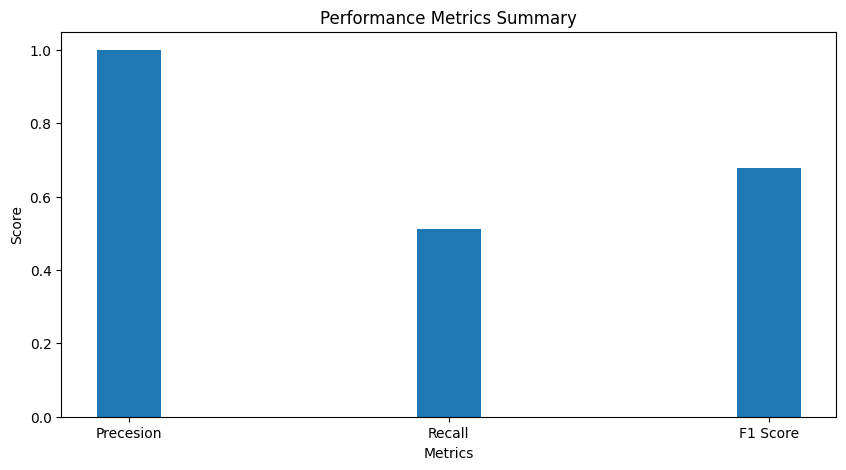

In [92]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_target))

In [93]:
cm = confusion_matrix(y_t_resampled, y_predict_target)

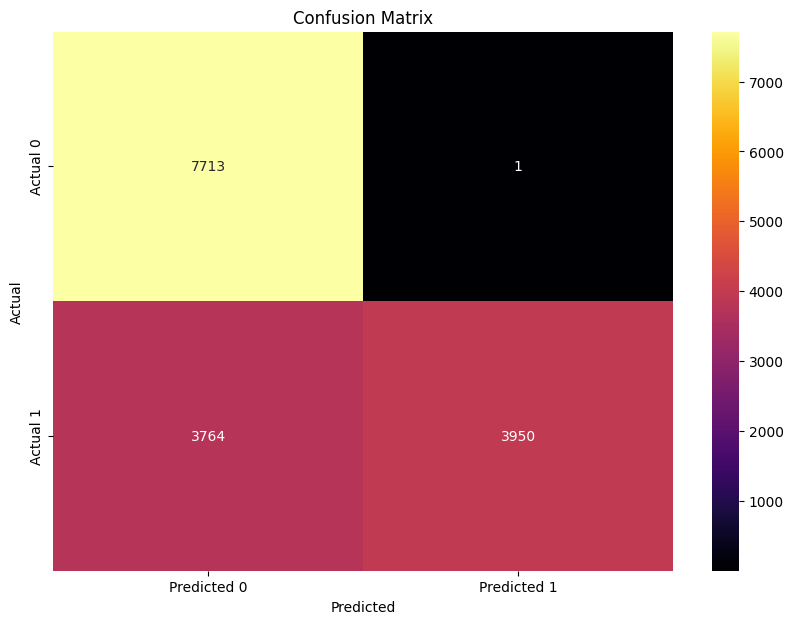

In [94]:
confusion_matrix_visualize(cm)

## Logistic Regression


In [95]:
#LogisticReg = LogisticRegression()
LogisticReg = LogisticRegression(C= 0.01, max_iter= 1000, solver= 'newton-cg',random_state=42)

In [96]:
LogisticReg.fit(X_train_scaled, y_resampled)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='newton-cg')

In [97]:
y_predict_lg = LogisticReg.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_t_resampled, y_predict_lg)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.56%


In [98]:
# Claculating Precesion , F1 Score and Recall for the new model

In [99]:
print(Cal_precesion_f1_recalll(y_t_resampled,y_predict_lg))
#{'Precesion': 0.6082928482657327, 'Recall': 0.6979517759917034, 'F1 Score': 0.6500452761847269}

{'Precesion': 0.9947315604616157, 'Recall': 0.5140005185377237, 'F1 Score': 0.6777777777777778}


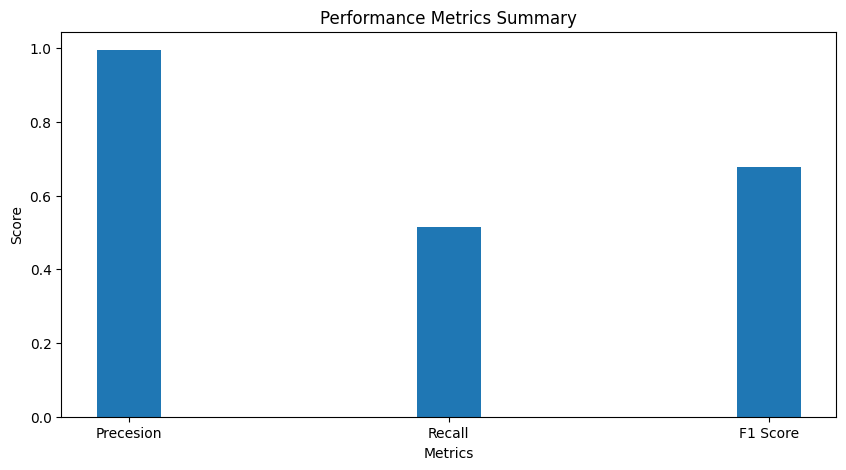

In [100]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_lg))

In [101]:
cm = confusion_matrix(y_t_resampled, y_predict_lg)

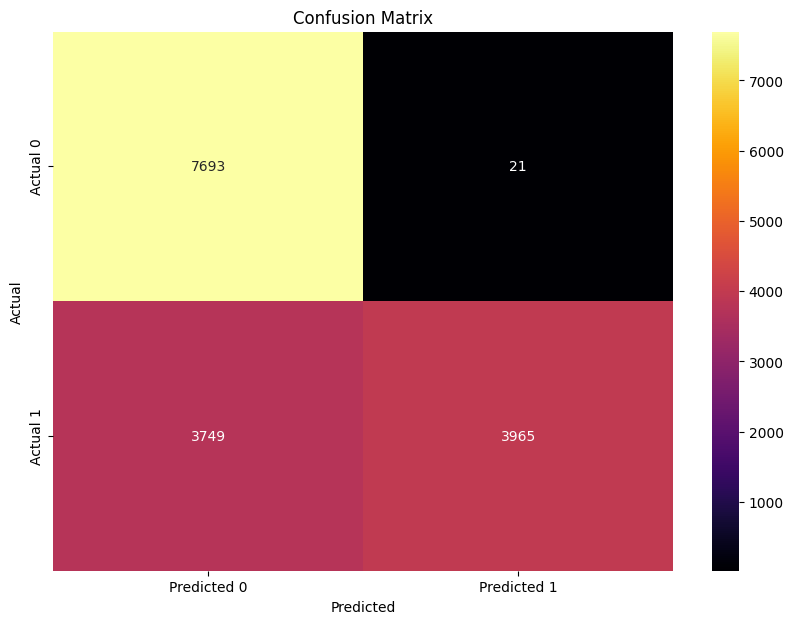

In [102]:
confusion_matrix_visualize(cm)

## Naive bayes Classifier using GausianNB

In [103]:
nb_classifier = GaussianNB(var_smoothing=1e-9)

In [104]:
nb_classifier.fit(X_train_scaled, y_resampled)

GaussianNB()

In [105]:
y_predict_nb = nb_classifier.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_t_resampled, y_predict_nb)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 60.86%


In [106]:
# precision    recall  f1-score   support

In [107]:
Cal_precesion_f1_recalll(y_t_resampled,y_predict_nb)

{'Precesion': 0.5677335919818945,
 'Recall': 0.9105522426756546,
 'F1 Score': 0.6993926117693916}

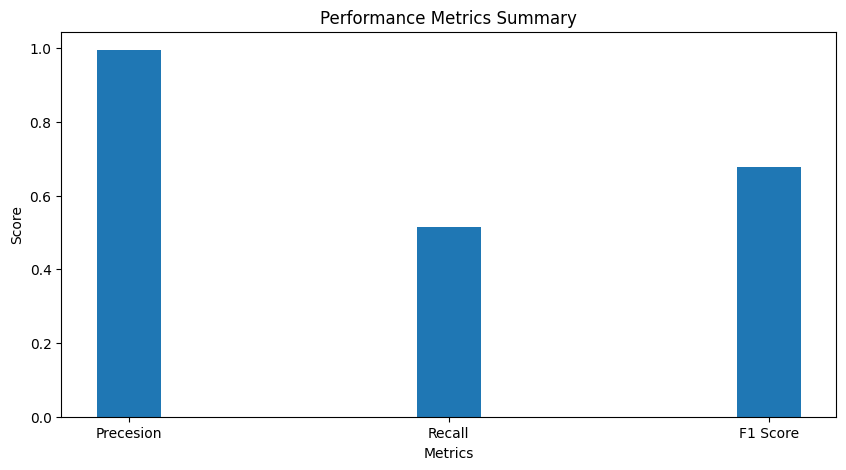

In [108]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_lg))

In [109]:
# Confusion Matrix
cm = confusion_matrix(y_t_resampled, y_predict_nb)

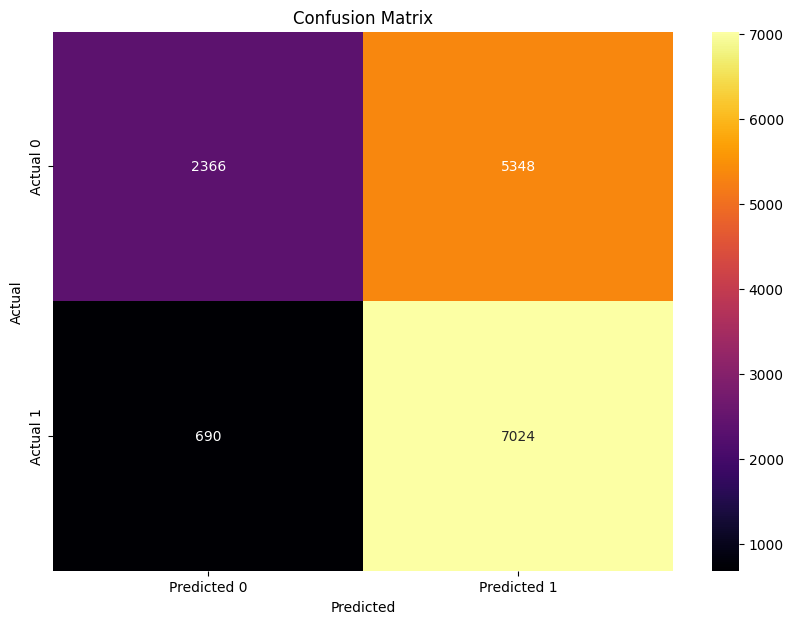

In [110]:
confusion_matrix_visualize(cm)

## K Nearest Neighbours

In [111]:
knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean',weights='distance')

In [112]:
knn.fit(X_train_scaled, y_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [113]:
y_predict_knn = knn.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_t_resampled, y_predict_knn)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 73.50%


In [114]:
# precision    recall  f1-score   support

In [115]:
print(Cal_precesion_f1_recalll(y_t_resampled,y_predict_knn))

{'Precesion': 0.8010627698439057, 'Recall': 0.6253564946849883, 'F1 Score': 0.7023878858474083}


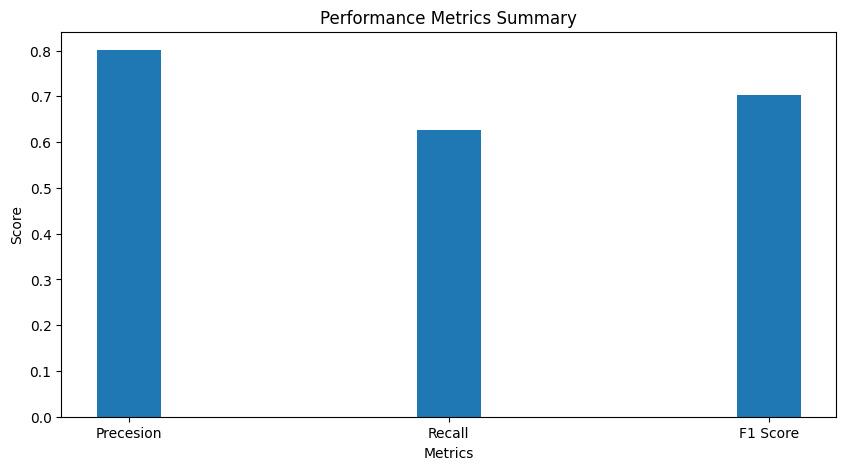

In [116]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_knn))

In [117]:
# Confusion Matrix
cm = confusion_matrix(y_t_resampled, y_predict_knn)

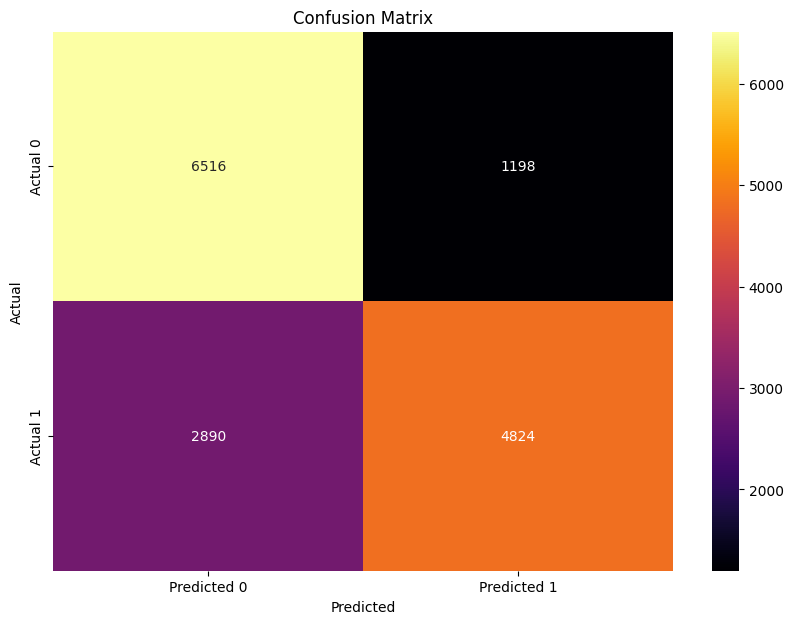

In [118]:
confusion_matrix_visualize(cm)

## Kmeans Clustering

In [119]:
kmeans = KMeans(n_clusters=2,random_state=42)

In [120]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=42)

In [121]:
predict_kmeans = kmeans.predict(X_test_scaled)

In [122]:
accuracy = accuracy_score(y_t_resampled, predict_kmeans)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 51.39%


In [123]:
print(Cal_precesion_f1_recalll(y_t_resampled,predict_kmeans))

{'Precesion': 0.5132863675689037, 'Recall': 0.5383717915478351, 'F1 Score': 0.5255298956026574}


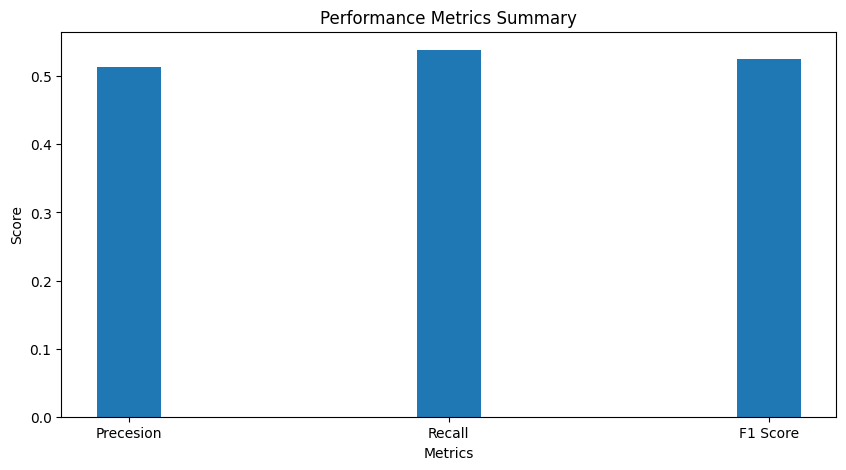

In [124]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,predict_kmeans))

In [125]:
# Confusion Matrix
cm = confusion_matrix(y_t_resampled, predict_kmeans)

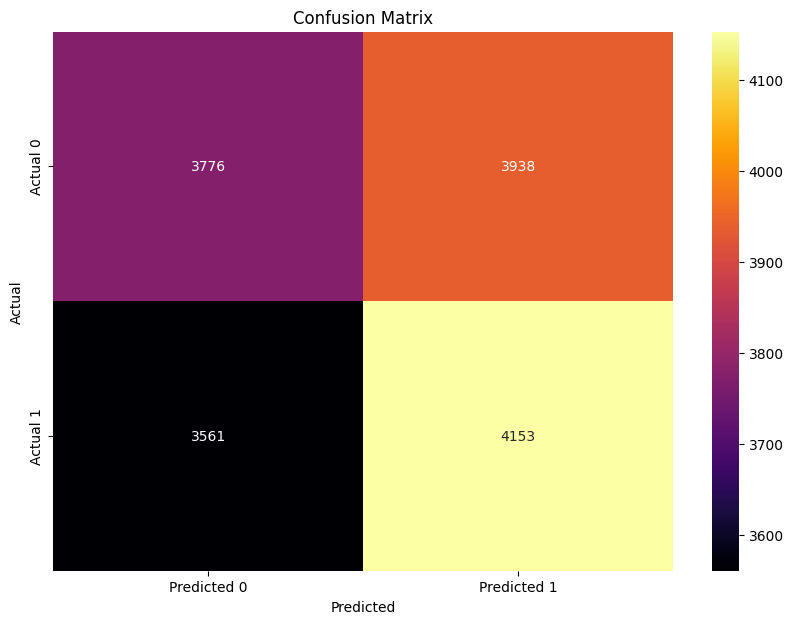

In [126]:
confusion_matrix_visualize(cm)

## Decision Tree

In [127]:
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',              # 'gini' for Gini Impurity or 'entropy' for Information Gain
    splitter='best',               # 'best' to choose the best split or 'random' for random split
    random_state=42                # Controls the randomness of the estimator
)


In [128]:
dt_classifier.fit(X_train_scaled, y_resampled)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [129]:
print(X_train_scaled[0])

[-1.16375384 -0.93016123  1.04160503  2.11643827 -0.79886343 -0.73810064
  2.48200766 -0.361047   -1.07729365  0.61854469 -0.38255199  1.69541354
 -0.49062303 -0.37472345 -0.34312761 -0.17516459 -0.15062695 -0.05673613
 -0.03821796 -0.03040657]


In [130]:
y_predict_dtree = dt_classifier.predict(X_test_scaled)

In [131]:
accuracy = accuracy_score(y_t_resampled, y_predict_dtree)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 74.06%


In [132]:
X_train_scaled_df = pd.DataFrame(X_test_scaled, columns = ["City_Code_encoded","Region_Code","Accomodation_Type","Reco_Insurance_Type","Upper_Age","Lower_Age","Is_Spouse","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium","HI__X1","HI__X2","HI__X3","HI__X4","HI__X5","HI__X6","HI__X7","HI__X8","HI__X9"])



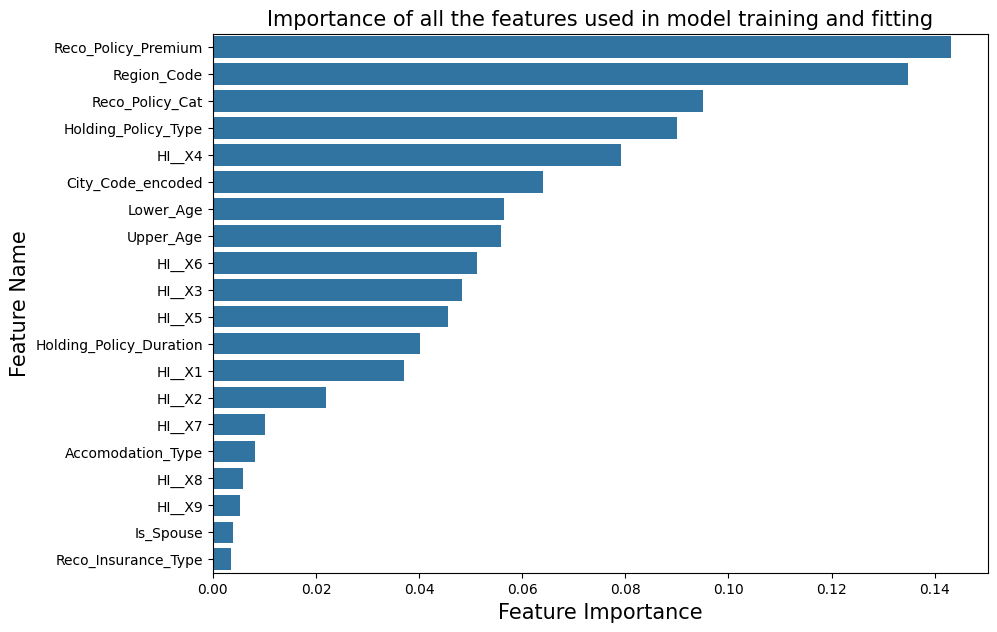

In [133]:
important_features = pd.DataFrame({
    "Feature Name": X_train_scaled_df.columns,
    "Feature Importance": dt_classifier.feature_importances_
})
important_fe = important_features.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize = (10,7))
sns.barplot(data = important_fe, x = 'Feature Importance', y = 'Feature Name')
plt.title('Importance of all the features used in model training and fitting', fontsize=15)
plt.xlabel ('Feature Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

In [134]:
accuracy = accuracy_score(y_t_resampled, y_predict_dtree)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 74.06%


In [135]:
# precision    recall  f1-score   support

In [136]:
print(Cal_precesion_f1_recalll(y_t_resampled,y_predict_dtree))

{'Precesion': 0.7464807436918991, 'Recall': 0.7286751361161524, 'F1 Score': 0.7374704801889268}


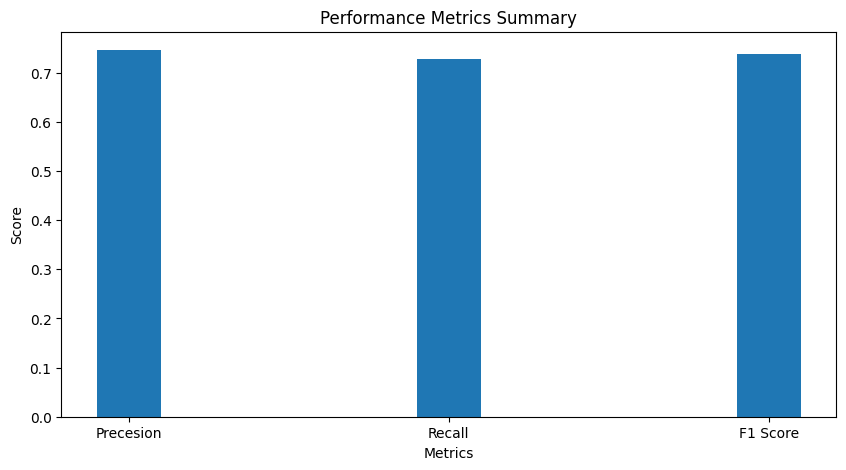

In [137]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_dtree))

In [138]:
# Confusion Matrix
cm = confusion_matrix(y_t_resampled, y_predict_dtree)


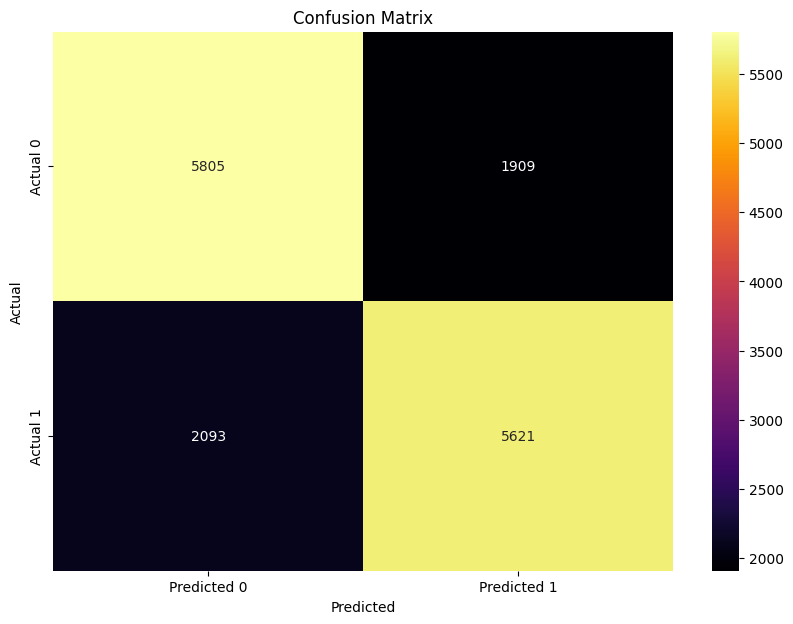

In [139]:
confusion_matrix_visualize(cm)

## Neural Network

In [140]:

nn = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam',early_stopping=True, max_iter=500)

nn.fit(X_train_scaled, y_resampled)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(200,), max_iter=500)

In [141]:
y_predict_nn = nn.predict(X_test_scaled)

In [142]:
# Calculate accuracy
accuracy = accuracy_score(y_t_resampled, y_predict_nn)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 75.88%


In [143]:
print(Cal_precesion_f1_recalll(y_t_resampled,y_predict_nn))

{'Precesion': 0.919856962557846, 'Recall': 0.5668913663469017, 'F1 Score': 0.7014757779916586}


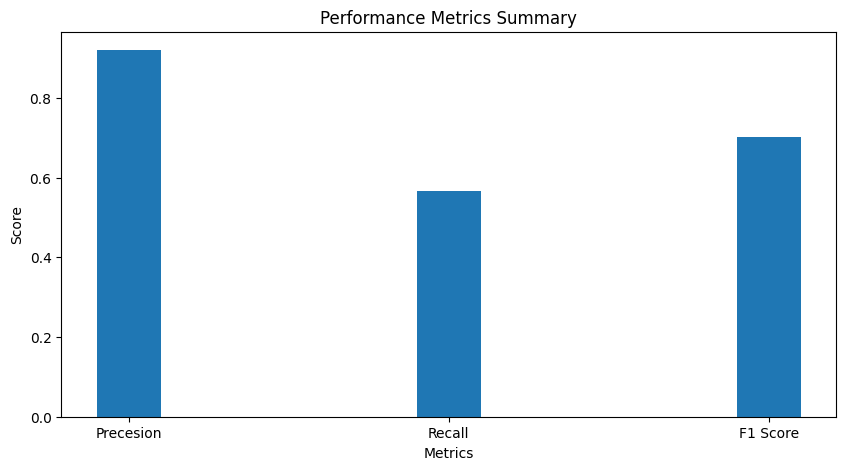

In [144]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_t_resampled,y_predict_nn))

In [145]:
# Confusion Matrix
cm = confusion_matrix(y_t_resampled, y_predict_nn)


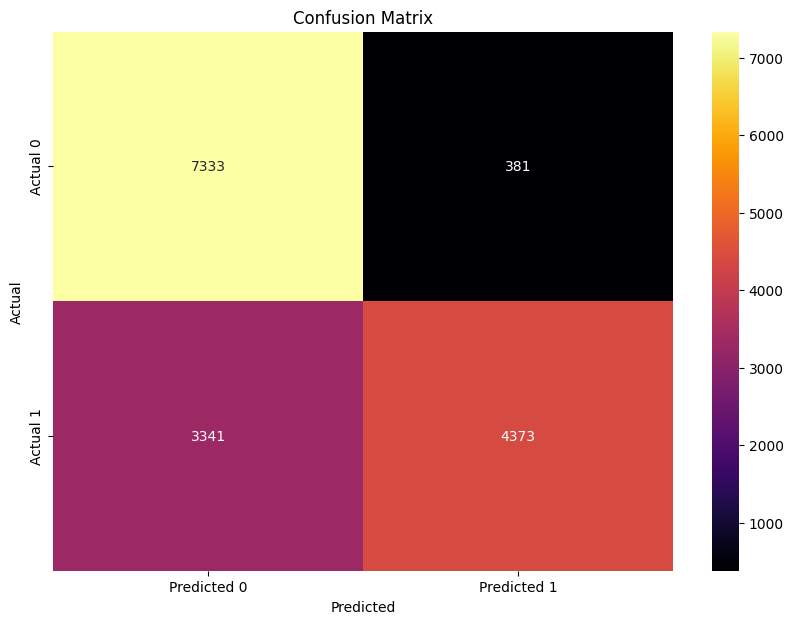

In [146]:
confusion_matrix_visualize(cm)

## Random Forest

In [147]:
# Initially we take all the features into X vector and the target into y
A  = Dataset.copy()
B =  A.pop('Response')

In [148]:
xtrain, xtest, ytrain, ytest = train_test_split(A, B, test_size=0.20, random_state=42,stratify=y)

In [149]:
xtrain = xtrain[["City_Code_encoded","Region_Code","Accomodation_Type","Reco_Insurance_Type","Upper_Age","Lower_Age","Is_Spouse","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium","HI__X1","HI__X2","HI__X3","HI__X4","HI__X5","HI__X6","HI__X7","HI__X8","HI__X9"]]
xtest = xtest[["City_Code_encoded","Region_Code","Accomodation_Type","Reco_Insurance_Type","Upper_Age","Lower_Age","Is_Spouse","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat","Reco_Policy_Premium","HI__X1","HI__X2","HI__X3","HI__X4","HI__X5","HI__X6","HI__X7","HI__X8","HI__X9"]]

In [150]:

random_forest = RandomForestClassifier(n_estimators = 500,class_weight = 'balanced' ,criterion = 'entropy', max_depth = 30,max_features = xtrain.shape[1])

# Fit the model on the training data
random_forest.fit(xtrain, ytrain)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, max_features=20, n_estimators=500)

In [151]:
# Predict the labels of the test data
y_predict_rf = random_forest.predict(xtest)

In [152]:
accuracy = accuracy_score(y_test, y_predict_rf)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 75.39%


In [153]:
print(Cal_precesion_f1_recalll(y_test,y_predict_rf))

{'Precesion': 0.4465195246179966, 'Recall': 0.10805258833196385, 'F1 Score': 0.1739993384055574}


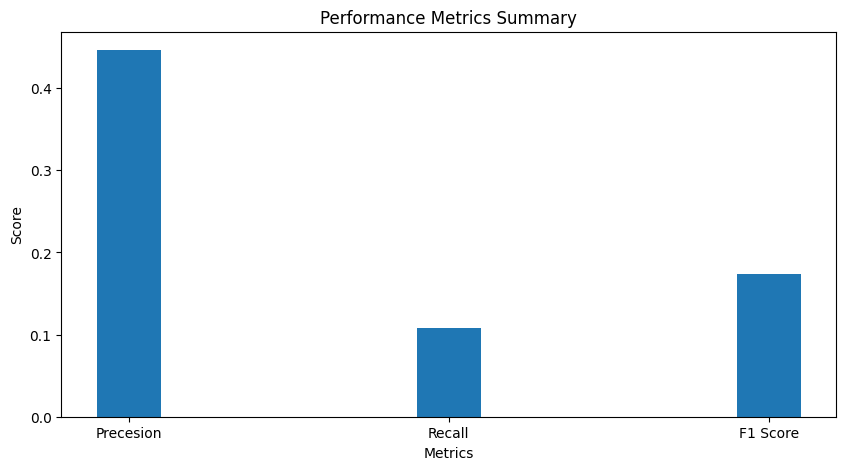

In [154]:
Summary_bar_graph(Cal_precesion_f1_recalll(y_test,y_predict_rf))

In [155]:
# Confusion Matrix
cm = confusion_matrix(ytest, y_predict_rf)


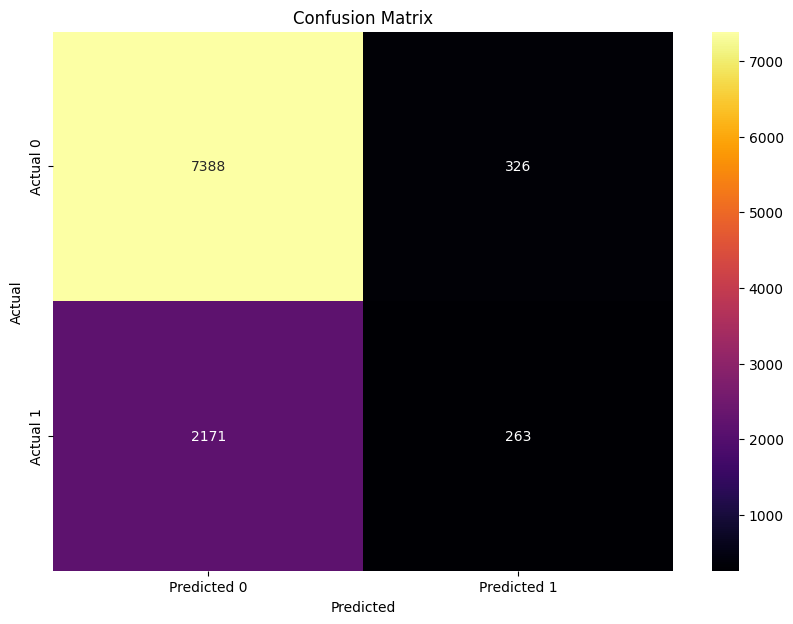

In [156]:
confusion_matrix_visualize(cm)

# Project Phase 3
### Surya Venkata Rohit Moganti - 50560088
### Bhavani Kiran Kukunoor - 50560517

## Saving All the implemented Models

In [157]:
import pickle as pik

## 1 . Linear Regression

In [158]:
LinearReg_model_pkg = 'Models/LinearReg.pkl'  

# Use 'wb' to write binary file
with open(LinearReg_model_pkg, 'wb') as file:
    pik.dump(LinearReg, file)


## 2 . Logistioc Regression

In [159]:
LogisticReg_model_pkg = 'Models/LogisticReg.pkl'  

# Use 'wb' to write binary file
with open(LogisticReg_model_pkg, 'wb') as file:
    pik.dump(LogisticReg, file)


## 3 . Naive Bayes Classifier

In [160]:

nb_classifier_model_pkg = 'Models/nb_classifier.pkl'  

# Use 'wb' to write binary file
with open(nb_classifier_model_pkg, 'wb') as file:
    pik.dump(nb_classifier, file)


## 4 . K Nearest Neighbours

In [161]:

knn_model_pkg = 'Models/knn.pkl'  

# Use 'wb' to write binary file
with open(knn_model_pkg, 'wb') as file:
    pik.dump(knn, file)


## 5 . Kmeans Clustering

In [162]:
kmeans_model_pkg = 'Models/kmeans.pkl'  

# Use 'wb' to write binary file
with open(kmeans_model_pkg, 'wb') as file:
    pik.dump(kmeans, file)


## 6. Decision Tree

In [163]:
dt_model_pkg = 'Models/dt.pkl'  

# Use 'wb' to write binary file
with open(dt_model_pkg, 'wb') as file:
    pik.dump(dt_classifier, file)



## 7 . Neural Network

In [164]:
nn_model_pkg = 'Models/nn.pkl'  

# Use 'wb' to write binary file
with open(nn_model_pkg, 'wb') as file:
    pik.dump(nn, file)


## 8 . Random Forest

In [165]:
random_forest_model_pkg = 'Models/random_forest.pkl'  

# Use 'wb' to write binary file
with open(random_forest_model_pkg, 'wb') as file:
    pik.dump(random_forest, file)